## GİRİŞ

PyTorch, iki ana hedef kitlesi için geliştirilmiş bir Python tabanlı bilimsel hesaplama paketidir. Birincisi, NumPy'nin yerine GPU gücünden yararlanmak isteyen kullanıcılar için uygun bir seçenek sunar. İkincisi ise, maksimum esneklik ve hız sağlayan bir derin öğrenme araştırma platformudur.

**Avantajlar:**
- PyTorch'un interaktif hata ayıklama özelliği, kullanıcıların çoğu tarafından övgüyle karşılanır. Hem PyTorch hem de diğer çerçeveleri kullananlar, PyTorch'un hata ayıklama ve görselleştirme süreçlerini önemli ölçüde kolaylaştırdığını belirtirler.
- Dinamik grafikler için sağlam destek.
- Facebook gibi büyük bir organizasyonun desteklediği bir proje olması.
- Yüksek seviye ve düşük seviye API'ların başarılı bir karışımı.

**Dezavantajlar:**
- Diğer seçeneklere göre daha az olgun olması, yani henüz tam olarak geliştirilmiş olmaması.
- Resmi dökümantasyon dışında sınırlı referans ve kaynakların bulunması.

Bu derste, matrislerden yapay sinir ağına kadar olan temel kavramları öğreneceksiniz. Bu kısımları iyi anlarsanız, CNN veya RNN gibi daha karmaşık bölümleri uygulamak çok daha kolay olacaktır.

## PyTorch Temelleri

### Matrisler
- PyTorch'ta, matrisler (diziler) tensör olarak adlandırılır. Tensörler, birçok boyutta dizilmiş sayısal verileri temsil eder.
- Örneğin, 3 satır ve 3 sütuna sahip bir matris oluşturduğumuzda, bu aslında 3x3 boyutunda bir tensördür.
- Numpy ile tanıdığımız bir dizi örneğine bakalım:
    - Numpy kütüphanesinin `np.numpy()` yöntemini kullanarak bir dizi oluştururuz.
    - `Type()`: Dizinin türünü gösterir. Bu örnekte, dizinin numpy türünde olduğunu görüyoruz.
    - `np.shape()`: Dizinin boyutunu gösterir. Yani, kaç satır ve sütundan oluştuğunu belirtir.

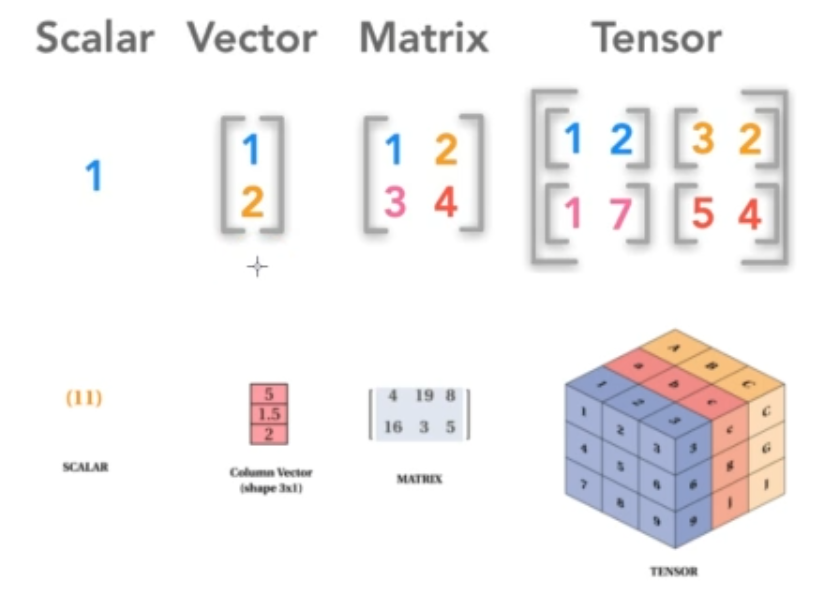

In [2]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array)
print("Array Type: {}".format(type(first_array))) 
print("Array Shape: {}".format(np.shape(first_array))) 

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)


In [3]:
first_array

array([[1, 2, 3],
       [4, 5, 6]])

- Numpy dizisine baktık.
- Şimdi, tensörü (pytorch dizisi) nasıl uyguladığımıza bakalım.
- PyTorch kütüphanesini `import torch` ile içe aktarırız.
- Tensörü `torch.Tensor()` yöntemiyle oluştururuz.
- `type`: Dizinin türünü gösterir. Bu örnekte, dizinin bir tensör olduğunu görüyoruz.
- `shape`: Dizinin boyutunu gösterir. Yani, kaç satır ve sütundan oluştuğunu belirtir.

In [6]:
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape

Array Type: <built-in method type of Tensor object at 0x00000199C327F5B0>
Array Shape: torch.Size([2, 3])


In [7]:
tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]])

- Bellek tahsisi, kodlama alanında en çok kullanılan tekniklerden biridir. Bu nedenle, bunu PyTorch ile nasıl yapacağımızı öğrenelim.
- Öğrenmek için, numpy ve tensor'ı karşılaştıracağız:
    - np.ones() = torch.ones()
    - np.random.rand() = torch.rand()

In [8]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [9]:
torch.ones((2,3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [10]:
np.random.rand(2,3)

array([[0.74877799, 0.24057871, 0.21625923],
       [0.09543896, 0.47127521, 0.62938953]])

In [11]:
torch.rand(2,3)

tensor([[0.8466, 0.4852, 0.1507],
        [0.5815, 0.2234, 0.3566]])

- Yapay sinir ağları için PyTorch kullansakda, genellikle numpy kullanmak daha iyi ve kolaydır. Bu nedenle, genellikle tensor olan yapay sinir ağı sonuçlarını görselleştirmek veya incelemek için numpy dizisine dönüştürürüz.
- Tensor ve numpy dizileri arasında dönüşümü inceleyelim:
    - torch.from_numpy(): numpy'den tensive
    - numpy(): tensorden numpy'ye

In [20]:
# random numpy array
arr = np.random.rand(2,2)
type(arr)

numpy.ndarray

In [21]:
arr

array([[0.62132943, 0.74782417],
       [0.95036647, 0.01522402]])

In [22]:
# from numpy to tensor
numpy_to_tensor = torch.from_numpy(array)
numpy_to_tensor

tensor([[0.1864, 0.7996],
        [0.0182, 0.9800]], dtype=torch.float64)

In [23]:
# from tensor to numpy
tensor = numpy_to_tensor
tensor_to_numpy = tensor.numpy()
type(tensor_to_numpy)

numpy.ndarray

In [24]:
tensor_to_numpy

array([[0.18635788, 0.79959676],
       [0.01817696, 0.98004897]])

### Pytorch ile Temel Matematik İşlemleri
- Yeniden Boyutlandırma: view()
- a ve b tensörlerdir.
- Toplama: torch.add(a,b) = a + b
- Çıkarma: a.sub(b) = a - b
- Eleman bazında çarpma: torch.mul(a,b) = a * b 
- Eleman bazında bölme: torch.div(a,b) = a / b 
- Ortalama: a.mean()
- Standart Sapma (std): a.std()

In [27]:
tensor = torch.ones(3,3)

In [28]:
tensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [29]:
tensor.view(9).shape

torch.Size([9])

In [30]:
tensor.view(9)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [31]:
torch.add(tensor,tensor)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [32]:
tensor.sub(tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [33]:
torch.mul(tensor,tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [34]:
torch.div(tensor,tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [35]:
tensor = torch.Tensor([1,2,3,4,5])

In [38]:
tensor.mean()

tensor(3.)

In [39]:
tensor.std()

tensor(1.5811)

### Değişkenler (Variables)
- Gradyanlar, yapay sinir ağlarında kullanılan bir teknik olan geriye yayılım (backpropagation) sırasında hesaplanır ve değişkenler bu gradyanları biriktirir.
- Yapay sinir ağlarında PyTorch'u kullanıyoruz çünkü gradyanlar hesaplanırken kolaylık sağlar. Ancak bu konseptleri daha iyi anlamak için yapay sinir ağları hakkında bilgi sahibi olmalısınız. Eğer yapay sinir ağlarını bilmiyorsanız, öncelikle derin öğrenme öğreticimi kontrol edebilirsiniz. Çünkü optimizasyon, kayıp fonksiyonu veya geriye yayılma gibi kavramları ayrıntılı olarak açıklamayacağım.
- Değişkenler, tensörlerden farklı olarak gradyanları biriktirme özelliğine sahiptir.
- Değişkenlerle matematiksel işlemler yapabilir ve gradyanları takip edebiliriz.
- Geriye yayılım yapmak ve ağı eğitmek için değişkenlere ihtiyacımız vardır.

In [ ]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad = True)
var